In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
from PIL import Image

In [2]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
######################################################################
# OneLayerNetwork
######################################################################

class OneLayerNetwork(torch.nn.Module):
    def __init__(self):
        super(OneLayerNetwork, self).__init__()
        ### part d: implement OneLayerNetwork with torch.nn.Linear
        self.oneLayerNetwork = torch.nn.Linear(784,3)

    def forward(self, x):
        # x.shape = (n_batch, n_features)

        ### ==================== ###
        ### part d: implement the foward function
        outputs = self.oneLayerNetwork(x)
        ### ==================== ###
        return outputs

In [29]:
######################################################################
# TwoLayerNetwork
######################################################################

class TwoLayerNetwork(torch.nn.Module):
    def __init__(self):
        super(TwoLayerNetwork, self).__init__()
        ### ==================== ###
        ### part g: implement TwoLayerNetwork with torch.nn.Linear

        self.layerOne = torch.nn.Linear(784, 400)
        self.layerTwo = torch.nn.Linear(400, 3)

        ### ==================== ###

    def forward(self, x):
        # x.shape = (n_batch, n_features)

        ### ==================== ###
        ### part g: implement the foward function
        sig = torch.nn.Sigmoid()
        layer_1 = sig(self.layerOne(x))
        outputs = self.layerTwo(layer_1)

        ### ==================== ###
        return outputs

In [5]:
# load data from csv
# X.shape = (n_examples, n_features), y.shape = (n_examples, )
def load_data(filename):
    data = np.loadtxt(filename)
    y = data[:, 0].astype(int)
    X = data[:, 1:].astype(np.float32) / 255
    return X, y

In [6]:
# plot one example
# x.shape = (features, )
def plot_img(x):
    x = x.reshape(28, 28)
    img = Image.fromarray(x*255)
    plt.figure()
    plt.imshow(img)
    return

In [7]:
def evaluate_loss(model, criterion, dataloader):
    model.eval()
    total_loss = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        total_loss += loss.item()

    return total_loss / len(dataloader)

In [8]:
def evaluate_acc(model, dataloader):
    model.eval()
    total_acc = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        predictions = torch.argmax(outputs, dim=1)
        total_acc += (predictions==batch_y).sum()

    return total_acc / len(dataloader.dataset)

In [23]:
def train(model, criterion, optimizer, train_loader, valid_loader, epochs=31):
    train_loss_list = []
    valid_loss_list = []
    train_acc_list = []
    valid_acc_list = []
    for epoch in range(1, epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            pass
            ### ==================== ###
            ### part f: implement the training process
            ypred = model.forward(batch_X)
            model.zero_grad()
            loss = criterion(ypred, batch_y)
            loss.backward()
            optimizer.step()

            ### ==================== ###

        train_loss = evaluate_loss(model, criterion, train_loader)
        valid_loss = evaluate_loss(model, criterion, valid_loader)
        train_acc = evaluate_acc(model, train_loader)
        valid_acc = evaluate_acc(model, valid_loader)
        train_loss_list.append(train_loss)
        valid_loss_list.append(valid_loss)
        train_acc_list.append(train_acc)
        valid_acc_list.append(valid_acc)

        print(f"| epoch {epoch:2d} | train loss {train_loss:.6f} | train acc {train_acc:.6f} | valid loss {valid_loss:.6f} | valid acc {valid_acc:.6f} |")

    return train_loss_list, valid_loss_list, train_acc_list, valid_acc_list

First Label 1
Second Label 0
Third Label 2
Data preparation...
(300, 784) (150, 784)
Start training OneLayerNetwork...
| epoch  1 | train loss 0.694679 | train acc 0.893333 | valid loss 0.709019 | valid acc 0.846667 |
| epoch  2 | train loss 0.477695 | train acc 0.950000 | valid loss 0.498550 | valid acc 0.900000 |
| epoch  3 | train loss 0.360090 | train acc 0.960000 | valid loss 0.383579 | valid acc 0.926667 |
| epoch  4 | train loss 0.290298 | train acc 0.976667 | valid loss 0.315433 | valid acc 0.940000 |
| epoch  5 | train loss 0.244471 | train acc 0.976667 | valid loss 0.270930 | valid acc 0.946667 |
| epoch  6 | train loss 0.211944 | train acc 0.980000 | valid loss 0.239561 | valid acc 0.946667 |
| epoch  7 | train loss 0.187497 | train acc 0.980000 | valid loss 0.216186 | valid acc 0.953333 |
| epoch  8 | train loss 0.168323 | train acc 0.980000 | valid loss 0.198035 | valid acc 0.960000 |
| epoch  9 | train loss 0.152790 | train acc 0.983333 | valid loss 0.183491 | valid acc 0

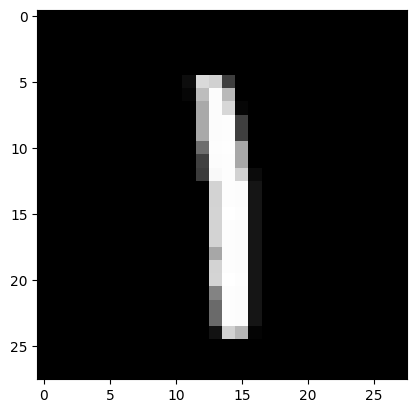

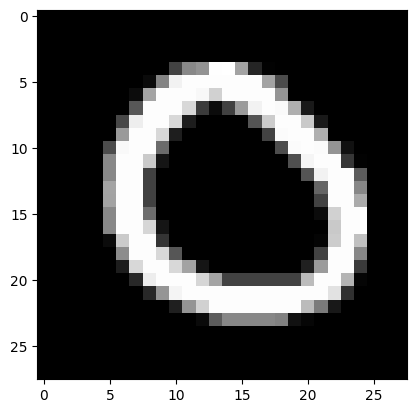

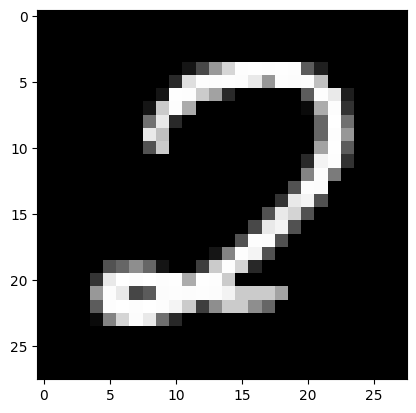

In [38]:
######################################################################
# main
######################################################################

# def main():

# fix random seed
np.random.seed(0)
torch.manual_seed(0)

# load data with correct file path

### ==================== ###
data_directory_path =  "/content/drive/My Drive/PS3"
### ==================== ###

# X.shape = (n_examples, n_features)
# y.shape = (n_examples, )
X_train, y_train = load_data(os.path.join(data_directory_path, "ps3_train.csv"))
X_valid, y_valid = load_data(os.path.join(data_directory_path, "ps3_valid.csv"))
X_test, y_test = load_data(os.path.join(data_directory_path, "ps3_test.csv"))

### ==================== ###
### part a: print out three training images with different labels
plot_img(X_train[0])
print("First Label " + str(y_train[0]))
plot_img(X_train[1])
print("Second Label " + str(y_train[1]))
plot_img(X_train[15])
print("Third Label " + str(y_train[15]))
### ==================== ###

print("Data preparation...")
print(X_train.shape, X_test.shape)

### ==================== ###
### part b: convert numpy arrays to tensors
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)

X_valid = torch.from_numpy(X_valid)
y_valid = torch.from_numpy(y_valid)

X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test)

### ==================== ###

### ==================== ###
### part c: prepare dataloaders for training, validation, and testing
###         we expect to get a batch of pairs (x_n, y_n) from the dataloader
train_loader = DataLoader(TensorDataset(X_train,y_train), batch_size=10)
valid_loader = DataLoader(TensorDataset(X_valid,y_valid), batch_size=10)
test_loader = DataLoader(TensorDataset(X_test,y_test), batch_size=10)


### ==================== ###

### ==================== ###
### part e: prepare OneLayerNetwork, criterion, and optimizer
model_one = OneLayerNetwork()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_one.parameters(), lr=0.0005)
### ==================== ###

print("Start training OneLayerNetwork...")
results_one = train(model_one, criterion, optimizer, train_loader, valid_loader, epochs=31)
print("Done!")

### ==================== ###
### part h: prepare TwoLayerNetwork, criterion, and optimizer
model_two = TwoLayerNetwork()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_two.parameters(), lr=0.0005)

### ==================== ###

print("Start training TwoLayerNetwork...")
results_two = train(model_two, criterion, optimizer, train_loader, valid_loader, epochs=31)
print("Done!")

one_train_loss, one_valid_loss, one_train_acc, one_valid_acc = results_one
two_train_loss, two_valid_loss, two_train_acc, two_valid_acc = results_two

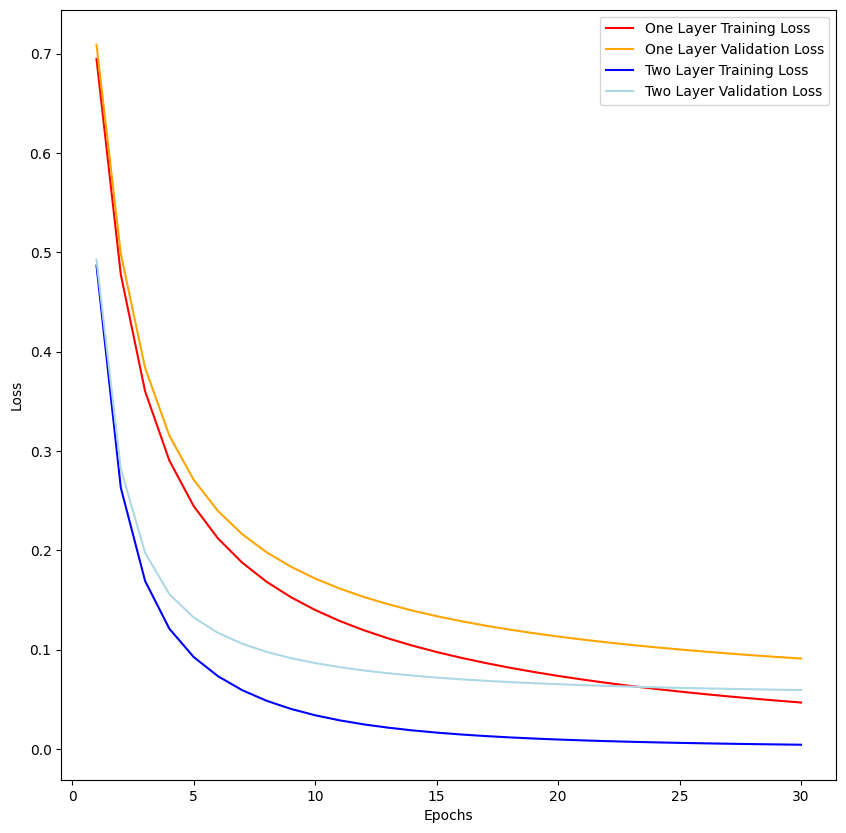

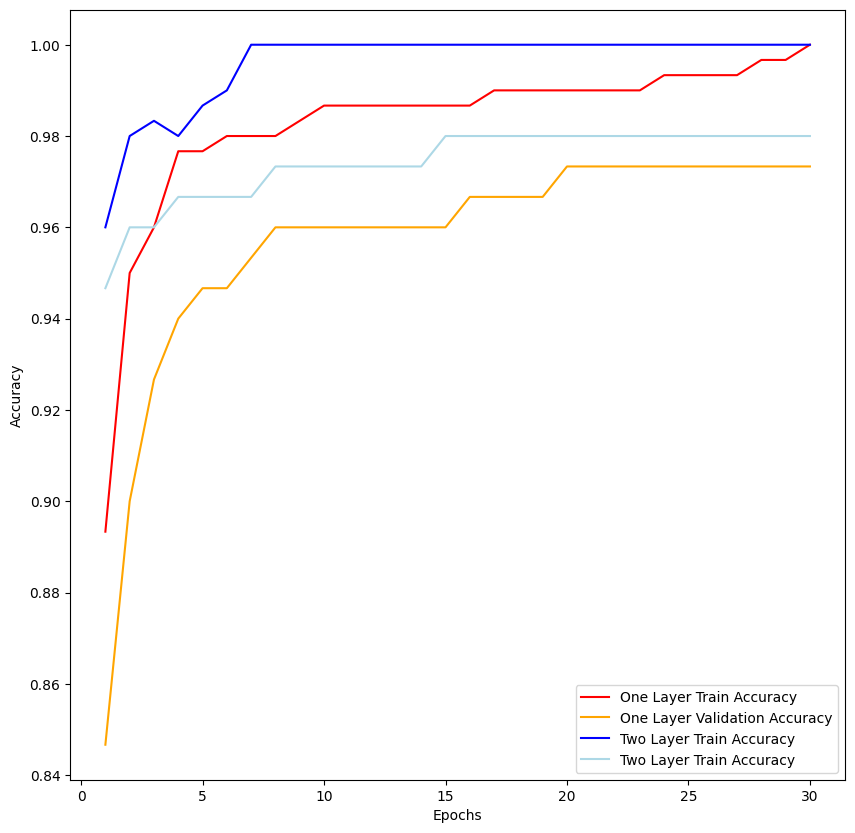

test accuracy of one layer network:  tensor(0.9667)
test accuracy of two layer network:  tensor(0.9667)


In [39]:

### ==================== ###
### part i: generate a plot to comare one_train_loss, one_valid_loss, two_train_loss, two_valid_loss
epochs = np.arange(1, 31)
plt.figure(figsize=[10,10])
plt.plot(epochs, one_train_loss, color='red', label='One Layer Training Loss')
plt.plot(epochs, one_valid_loss, color='orange', label='One Layer Validation Loss')
plt.plot(epochs, two_train_loss, color='blue', label='Two Layer Training Loss')
plt.plot(epochs, two_valid_loss, color='lightblue', label='Two Layer Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### ==================== ###

### ==================== ###
### part j: generate a plot to comare one_train_acc, one_valid_acc, two_train_acc, two_valid_acc
epochs = np.arange(1, 31)
plt.figure(figsize=[10,10])
plt.plot(epochs, one_train_acc, color='red', label='One Layer Train Accuracy')
plt.plot(epochs, one_valid_acc, color='orange', label='One Layer Validation Accuracy')
plt.plot(epochs, two_train_acc, color='blue', label='Two Layer Train Accuracy')
plt.plot(epochs, two_valid_acc, color='lightblue', label='Two Layer Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



### ========== ========== ##

### ==================== ###
### part k: calculate the test accuracy
print("test accuracy of one layer network: ", evaluate_acc(model_one, test_loader))
print("test accuracy of two layer network: ", evaluate_acc(model_two, test_loader))



### ==================== ###

### ========== TODO : START ========== ###
### part l: replace the SGD optimizer with the Adam optimizer and do the experiments again
### ========== TODO : END ========== ###



